In [1]:
##Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
##Importanto e lendo arquivo CSV
lucas = pd.read_csv("train.csv")

In [3]:
##Transformando arquivo em DataFrame
df = pd.DataFrame(lucas)

In [4]:
##Exibindo type de dados do DataFrame

print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
#Checando duplicados
duplicado = [df.duplicated()]
print("Valores Duplicados")
duplicado

Valores Duplicados


[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 886    False
 887    False
 888    False
 889    False
 890    False
 Length: 891, dtype: bool]

In [6]:
##Checando presença de nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
##Tratamento para registro de cabine
df["Cabin"].fillna("unregistered cabin",inplace=True)

In [8]:
##Tratamento para registro de idade
df["Age"].fillna(0,inplace=True)

In [9]:
##Tratamento para registro de porto de embarcação
df["Embarked"].fillna("unregistered Embarked",inplace=True)
df= df.replace('C','Cherbourg')
df= df.replace('Q','Queenstown')
df= df.replace('S','Southampton')

In [10]:
##Normalizando número tikect
##df['Ticket'] = df['Ticket'].str.extract('( )')

##print(df.to_string())


In [11]:
##Checando presença de nulos
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
##Criando colunas condicionais para classificar qual status de cada passageiro
df.loc[df["Survived"] == 0, "Status"] = "Death"
df.loc[df["Survived"] == 1, "Status"] = "Alive"

In [13]:
df.Age = df.Age.astype(int)

In [14]:
##Exibindo o DataFrame com a nova classificação
##print(df.to_string())

In [15]:
##Contando a ocorrencia de cada Status
count_status = df['Status'].value_counts()

In [16]:
##Exibindo a contagem
print(count_status)

Death    549
Alive    342
Name: Status, dtype: int64


In [17]:
##Contagem de registros com loop
Death = 0
Alive = 0
for survived in df["Survived"]:
    if survived == 1:
        Alive = Alive + 1
    elif survived == 0:
        Death = Death + 1
print('Death:{}'.format(str(Death)))
print('Alive:{}'.format(str(Alive)))

Death:549
Alive:342


<AxesSubplot:>

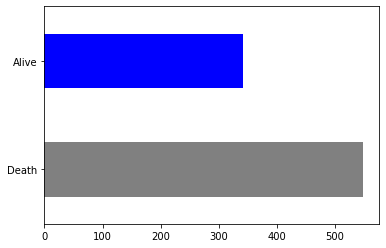

In [18]:
##Protando Gráfico
count_status.plot(kind='barh', color = ['gray','blue'])

In [19]:
##Retirando os registros com idade 0
df = df.query('Age > 0')
print(df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex  Age  SibSp  Parch              Ticket      Fare               Cabin               Embarked Status
0              1         0       3                                                             Braund, Mr. Owen Harris    male   22      1      0           A/5 21171    7.2500  unregistered cabin            Southampton  Death
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female   38      1      0            PC 17599   71.2833                 C85              Cherbourg  Alive
2              3         1       3                                                              Heikkinen, Miss. Laina  female   26      0      0    STON/O2. 3101282    7.9250  unregistered cabin            Southampton  Alive
3              4         1       1                                        Futrelle, Mrs. Jacques

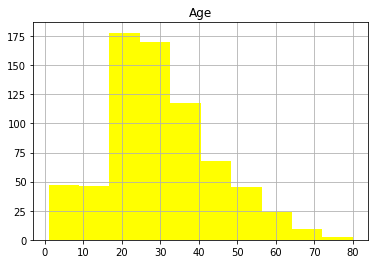

In [20]:
## Histograma com todos os passageiros

df.hist(column='Age', bins=10, color = 'yellow')
plt.show()

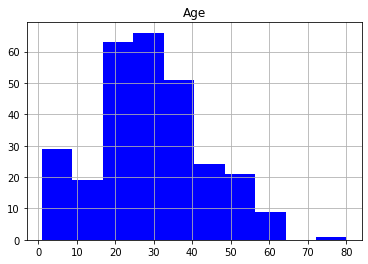

In [21]:
## Filtrar somente passageiros que sobreviveram + Histograma

Alive = df.query('Status == "Alive"')

Alive.hist(column='Age', bins=10, color = 'blue')
plt.show()

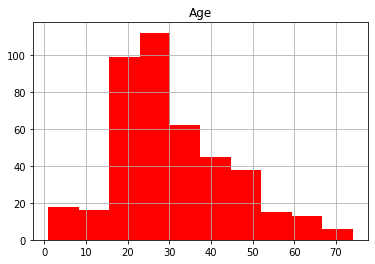

In [22]:
## Filtrar somente passageiros que não sobreviveram + Histograma

Death = df.query('Status == "Death"')

Death.hist(column='Age', bins=10, color = 'red')
plt.show()

In [23]:
for dataframe in df.Status.value_counts():
    print (dataframe)

424
283
